#### Classification of Spam Emails 
 In this project, we aim to develop and evaluate machine learning models for the classification of spam emails.
 The UC Irvine Spam Email Database, also known as the "Spambase" dataset, is a collection of labeled email messages designed for spam detection and classification tasks. The dataset consists of a total of 4,601 email messages, each labeled as either spam or non-spam (ham).  
 Link to data: https://archive.ics.uci.edu/dataset/94/spambase  
 The folder also contains the spambase documentation provided for this dataset

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_score, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [110]:
# Reading in the dataset
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'classified']
data = pd.read_csv('spambase.data', names=cols, header=None)
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

### Dataset Description
| Attribute                          | Type                 | Range         | Description                                                                                                                                                                                                                                                                                         |
|-----------------------------------|----------------------|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| word_freq_WORD (48 attributes)    | Continuous real      | [0, 100]      | Percentage of words in the email that match a particular word (WORD). Calculated as 100 * (number of times the WORD appears in the email) / (total number of words in the email).                                                                                                             |
| char_freq_CHAR (6 attributes)     | Continuous real      | [0, 100]      | Percentage of characters in the email that match a particular character (CHAR). Calculated as 100 * (number of CHAR occurrences) / (total characters in the email).                                                                                                                               |
| capital_run_length_average        | Continuous real      | [1, ...)      | Average length of uninterrupted sequences of capital letters in the email.                                                                                                                                                                                                                         |
| capital_run_length_longest        | Continuous integer   | [1, ...)      | Length of the longest uninterrupted sequence of capital letters in the email.                                                                                                                                                                                                                      |
| capital_run_length_total          | Continuous integer   | [1, ...)      | Sum of the lengths of uninterrupted sequences of capital letters in the email, or the total number of capital letters in the email.                                                                                                                                                              |
| classifies           | Nominal              | {0, 1}        | Denotes whether the email was considered spam (1) or not (0)

## EDA 

### Checking for Missing Values

In [111]:
# Checking the data for missing values
missing_values = data.isnull().sum()
# Print columns with missing values (if any) and their corresponding counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])
# There are no null values to handle in this dataset

Columns with missing values:
Series([], dtype: int64)


### Checking for duplicate rows

In [112]:
# Print the total number of rows
total_rows = data.shape[0]
print("Total number of rows:", total_rows)

# Taking care of duplicate rows
duplicate_count = data.duplicated().sum()
print("Total number of duplicate rows:", duplicate_count)

# We have dropped the duplicate rows
data.drop_duplicates(inplace=True)

# Print the shape of the DataFrame after removing duplicates
print("DataFrame shape after removing duplicates:", data.shape)

Total number of rows: 4601
Total number of duplicate rows: 391
DataFrame shape after removing duplicates: (4210, 58)


## EDA Plots

### Distribtution of Outcome Variable

/tmp/ipykernel_586738/1026799918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Spam', 'Non-Spam'], y=[spam_count, non_spam_count], palette = colors)


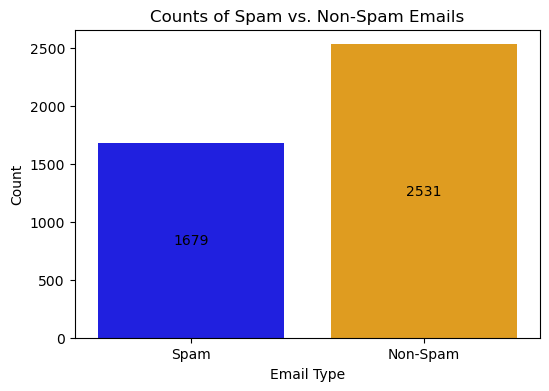

In [113]:
# Count the number of spam and non-spam emails
spam_count = data['classified'].value_counts()[1]  # Assuming 1 represents spam
non_spam_count = data['classified'].value_counts()[0]  # Assuming 0 represents non-spam

colors = ['blue', 'orange']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=['Spam', 'Non-Spam'], y=[spam_count, non_spam_count], palette = colors)
plt.title('Counts of Spam vs. Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')

for i, count in enumerate([spam_count, non_spam_count]):
    plt.text(i, count / 2, str(count), ha='center', va='center')

plt.show()

### Correlation plots

Trying to check whether any of the char_freq columns are highly correlated

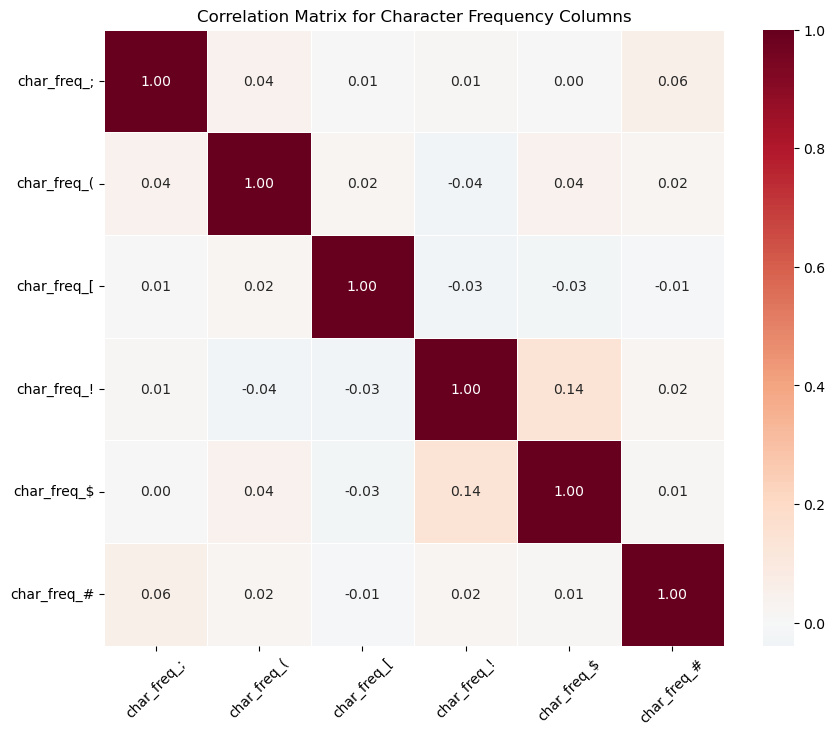

In [114]:
# Checking for correlation between char_freq counts
char_freq_columns = ['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']
char_freq_corr = data[char_freq_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(char_freq_corr, annot = True, cmap='RdBu_r', fmt=".2f", center=0, linewidths=0.5)
plt.title('Correlation Matrix for Character Frequency Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Trying to check whether any of the word_freq columns are highly correlated

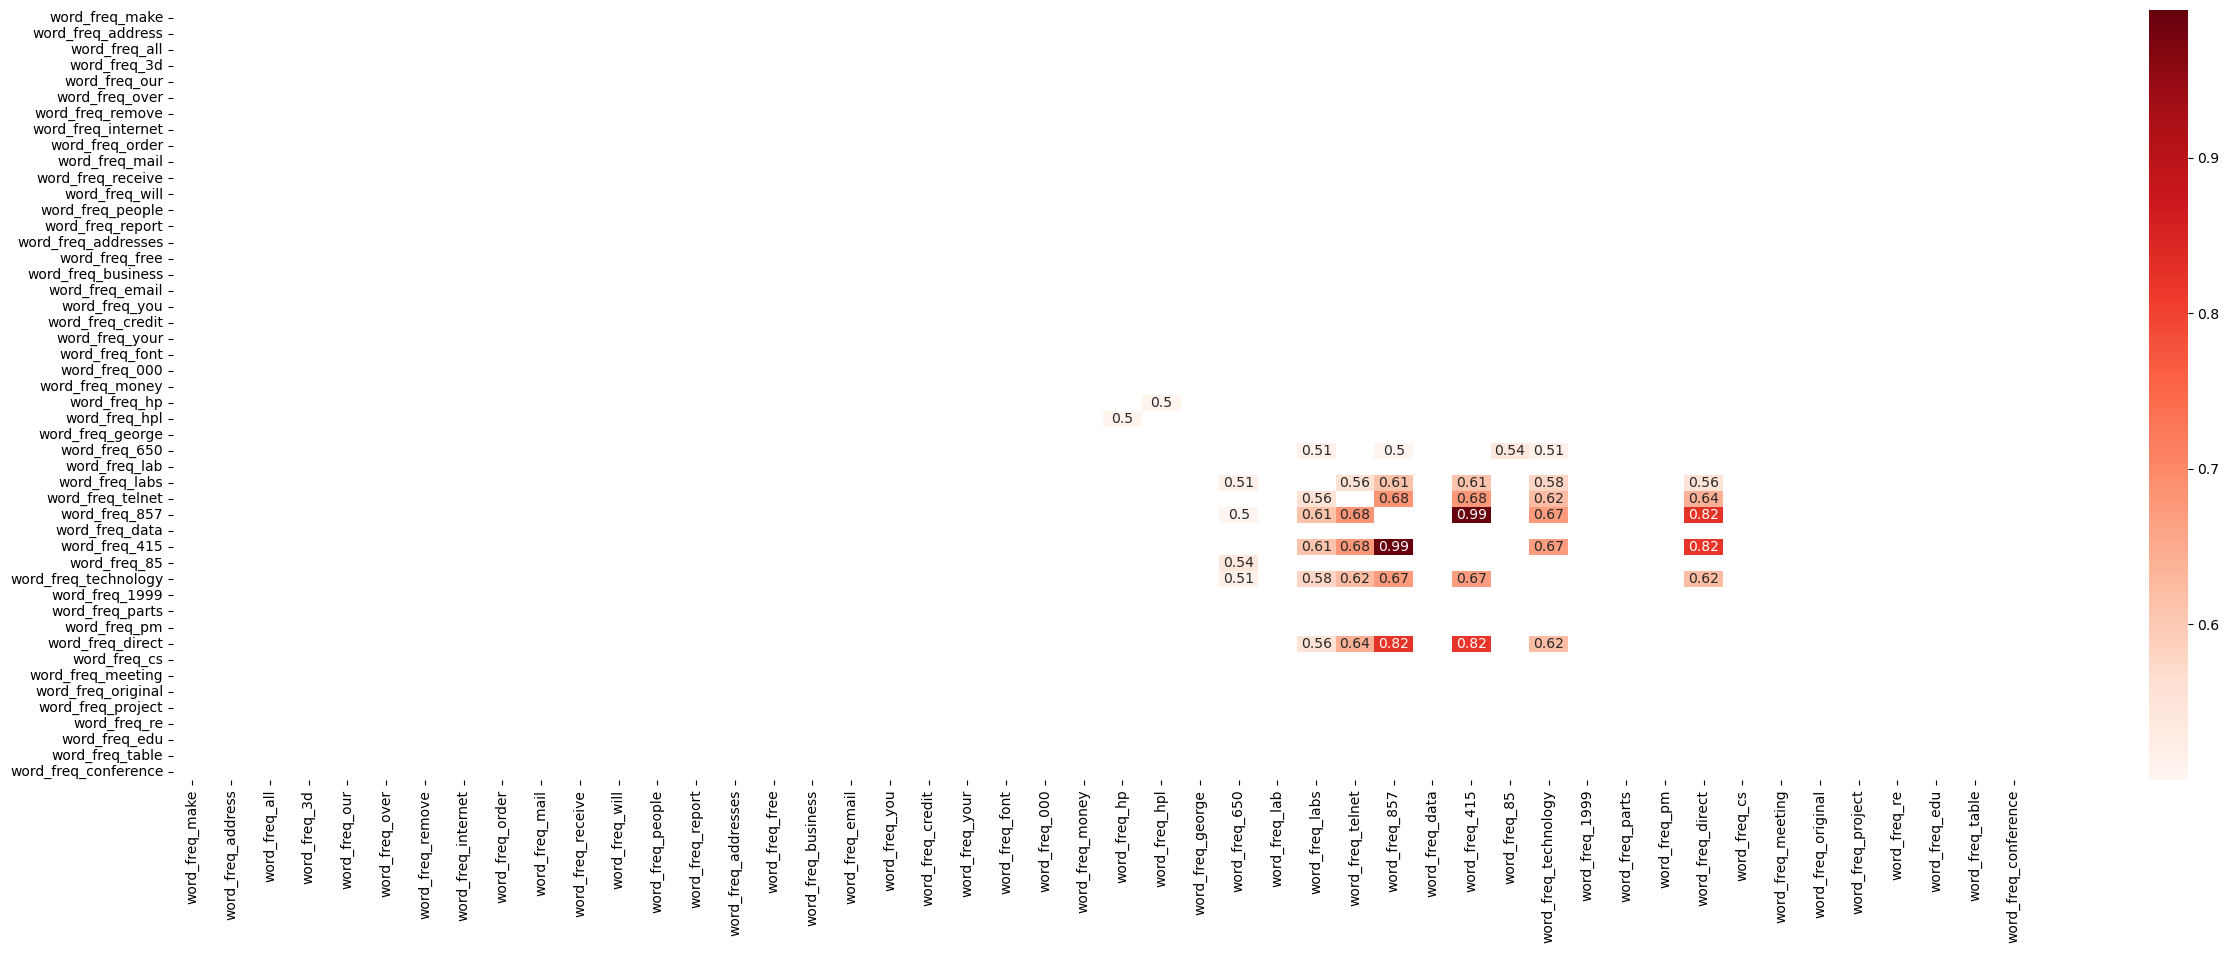

In [115]:
# Filter the DataFrame to select only the columns starting with 'word_freq_'
word_freq_columns = data.filter(regex=r'^word_freq_', axis=1)

# Calculate the correlation matrix
word_freq_corr = word_freq_columns.corr()

filteredDf = word_freq_corr [((word_freq_corr  >= .5) | (word_freq_corr  <= -.5)) & (word_freq_corr  !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()


### Distirbution of capital_run_length variables for Spam vs Non-Spam

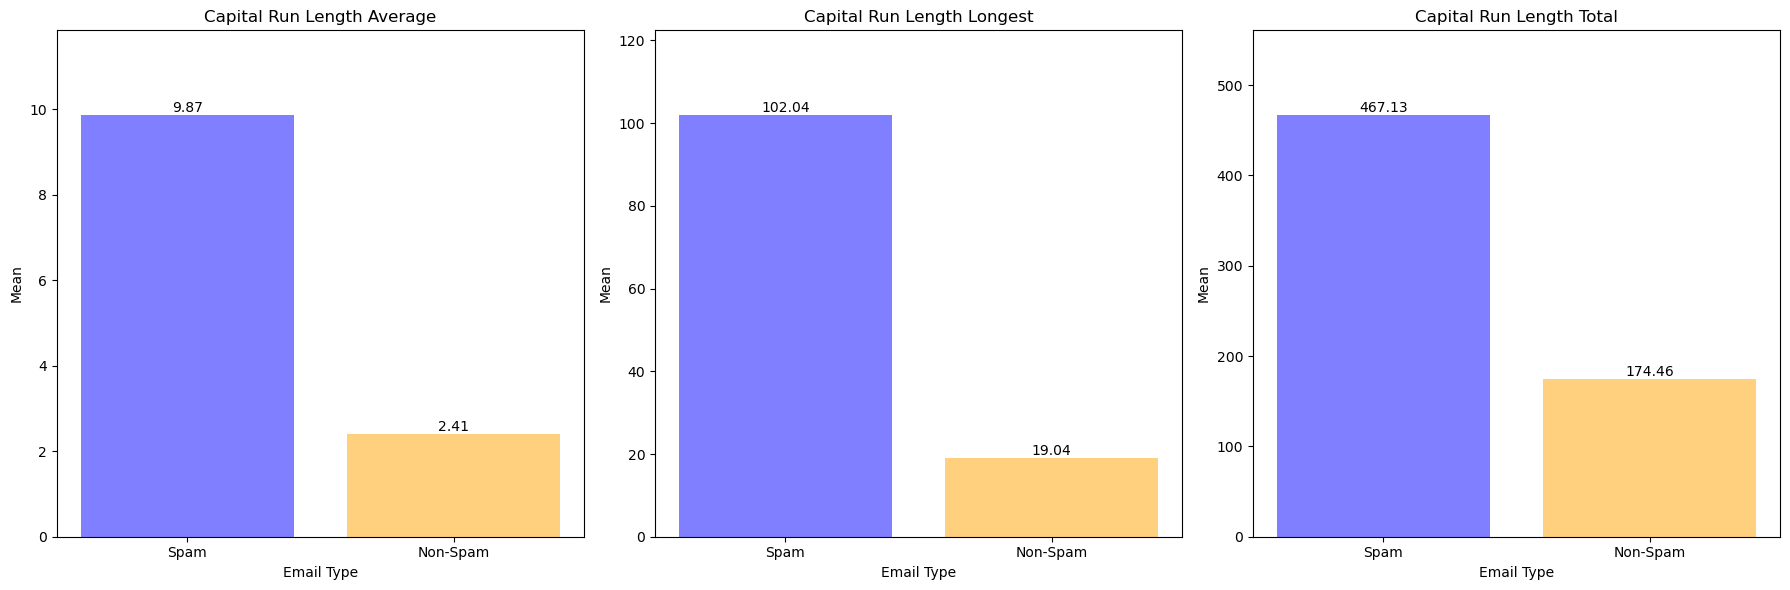

In [116]:
# Summary statistics for capital_run_length_average for spam emails
spam_average_summary = data[data['classified'] == 1]['capital_run_length_average'].describe()
# Summary statistics for capital_run_length_average for non-spam emails
non_spam_average_summary = data[data['classified'] == 0]['capital_run_length_average'].describe()
# Summary statistics for capital_run_length_longest for spam emails
spam_longest_summary = data[data['classified'] == 1]['capital_run_length_longest'].describe()
# Summary statistics for capital_run_length_longest for non-spam emails
non_spam_longest_summary = data[data['classified'] == 0]['capital_run_length_longest'].describe()
# Summary statistics for capital_run_length_total for spam emails
spam_total_summary = data[data['classified'] == 1]['capital_run_length_total'].describe()
# Summary statistics for capital_run_length_total for non-spam emails
non_spam_total_summary = data[data['classified'] == 0]['capital_run_length_total'].describe()

# Mean values for capital_run_length_longest and capital_run_length_total for spam and non-spam emails
spam_average_mean = round(spam_average_summary['mean'],2)
non_spam_average_mean = round(non_spam_average_summary['mean'],2)
spam_longest_mean = round(spam_longest_summary['mean'],2)
non_spam_longest_mean = round(non_spam_longest_summary['mean'],2)
spam_total_mean = round(spam_total_summary['mean'],2)
non_spam_total_mean = round(non_spam_total_summary['mean'],2)

# Create subplots
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for capital_run_length_average
axes[0].bar(['Spam', 'Non-Spam'], [spam_average_mean, non_spam_average_mean], color=['blue', 'orange'], alpha=0.5)
axes[0].text(0, spam_average_mean, str(spam_average_mean), ha='center', va='bottom', color='black')
axes[0].text(1, non_spam_average_mean, str(non_spam_average_mean), ha='center', va='bottom', color='black')
axes[0].set_title('Capital Run Length Average')
axes[0].set_xlabel('Email Type')
axes[0].set_ylabel('Mean')
axes[0].set_ylim(0, max(spam_average_mean, non_spam_average_mean) * 1.2)  # Adjust ylim

# Plot for capital_run_length_longest
axes[1].bar(['Spam', 'Non-Spam'], [spam_longest_mean, non_spam_longest_mean], color=['blue', 'orange'], alpha=0.5)
axes[1].text(0, spam_longest_mean, str(spam_longest_mean), ha='center', va='bottom', color='black')
axes[1].text(1, non_spam_longest_mean, str(non_spam_longest_mean), ha='center', va='bottom', color='black')
axes[1].set_title('Capital Run Length Longest')
axes[1].set_xlabel('Email Type')
axes[1].set_ylabel('Mean')
axes[1].set_ylim(0, max(spam_longest_mean, non_spam_longest_mean) * 1.2)  # Adjust ylim

# Plot for capital_run_length_total
axes[2].bar(['Spam', 'Non-Spam'], [spam_total_mean, non_spam_total_mean], color=['blue', 'orange'], alpha=0.5)
axes[2].text(0, spam_total_mean, str(spam_total_mean), ha='center', va='bottom', color='black')
axes[2].text(1, non_spam_total_mean, str(non_spam_total_mean), ha='center', va='bottom', color='black')
axes[2].set_title('Capital Run Length Total')
axes[2].set_xlabel('Email Type')
axes[2].set_ylabel('Mean')
axes[2].set_ylim(0, max(spam_total_mean, non_spam_total_mean) * 1.2)  # Adjust ylim

# Adjust layout
plt.tight_layout()
plt.show()

### Models

In [117]:
# Creating our predictor and outcome variables
X = data.iloc[:, :-1]
y = data.classified

# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features in training and test datasets.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model 1 : Logistic Regression

Logistic regression models the relationship between the predictor variables and the binary outcome using the logistic function. The logistic function transforms the output of a linear combination of the predictor variables into a value between 0 and 1.  

Logistic regression assumes that the relationship between the predictor variables and the log-odds of the outcome is linear. It also assumes that the observations are independent and that there is no multicollinearity among the predictor variables.

1. Parameters: The parameters of a logistic regression model are estimated using maximum likelihood estimation. 

2. Decision Boundary: Logistic regression uses a decision boundary to classify instances into one of the two classes based on their predicted probabilities. By default, the decision boundary is set at 0.5, but it can be adjusted depending on the specific requirements of the classification problem.

3. Evaluation: Logistic regression models are evaluated using various metrics such as accuracy, precision, recall, F1-score, and the area under the receiver operating characteristic (ROC) curve (AUC-ROC).


Logistic Regression Accuracy: 91.3895486935867
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       988
           1       0.92      0.87      0.89       696

    accuracy                           0.91      1684
   macro avg       0.91      0.91      0.91      1684
weighted avg       0.91      0.91      0.91      1684



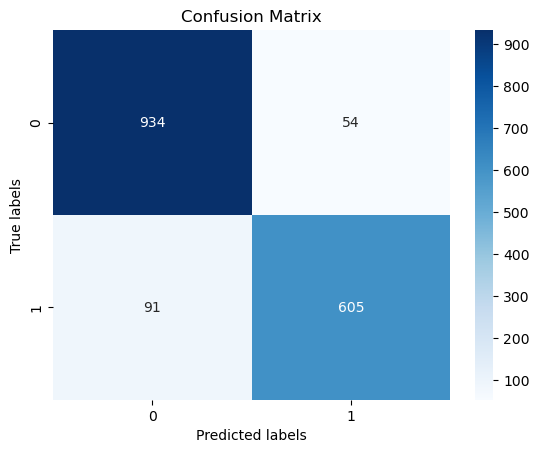

In [118]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
print("Logistic Regression Accuracy:",accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report for Logistic Regression:")
print(report)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

### Model 2 : Decision Tree Classifier

A classification tree is used to predict categorical data. The decision tree will consider all possible partitions of data and will each time choose the split that minimizes an impurity index like Gini or Entropy.

Decision Tree Accuracy: 90.14251781472684
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       988
           1       0.89      0.87      0.88       696

    accuracy                           0.90      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.90      0.90      0.90      1684



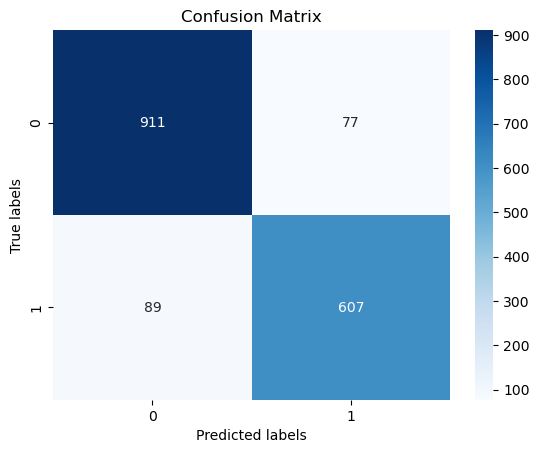

In [119]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)*100
confusion_mat = confusion_matrix(y_test,dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
report = classification_report(y_test, dt_pred)
print("Classification Report for Decision Tree:")
print(report)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


### Bagging

Bagging is the application of bootsrapping to a decision tree. We perform bootstrap resampling to the training data and fit a decision tree to each bootstrap sample. As the data used to train each tree is randomized there is some variation in the trees produced. To make a prediction we run the test observation through all the created decision trees and use a majority vote for classification

In [120]:
base_estimator = DecisionTreeClassifier(random_state=42)

bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the BaggingClassifier to the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree with Boosting Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree with Bagging:")
print(report)

/home/smeesala/miniconda3/envs/final_conda/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree with Boosting Accuracy: 0.9216152019002375
Classification Report for Decision Tree with Bagging:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       988
           1       0.93      0.88      0.90       696

    accuracy                           0.92      1684
   macro avg       0.92      0.92      0.92      1684
weighted avg       0.92      0.92      0.92      1684



### Disadvantages of bagging
* While bagging has improved the decision tree's predictive performance, it comes at the cost of interpretability. Decision trees are used for interpretability as it is easy to understand how it makes a prediction. Bagging combines multiple models, it may be harder to interpret compared to a single model. Understanding the contribution of each base estimator to the final prediction can be challenging.

* Since bagging samples with replacement, some of the same samples may appear in multiple bootstrap samples.it can lead to overfitting as it tends to produce overly correlated trees

### Model 3: Random Forest

While bagging randomizes the observations used in training data, random forest randomizes the variables used in creating a tree. The individual trees cannot use all of the available varaibles to create a split. By having sub-optimal diverse trees the resulting prediction made by the aggregate of all trees will be better

1. Create a bootsrap resample of training data
2. When fitting a tree choose only a random subset of predictor variables
3. Each tree will use a different random subset of predictor variables and different subset of training data
4. Make a prediction by majority voting for classification trees

Random Forest Accuracy: 93.58669833729216
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       988
           1       0.94      0.90      0.92       696

    accuracy                           0.94      1684
   macro avg       0.94      0.93      0.93      1684
weighted avg       0.94      0.94      0.94      1684



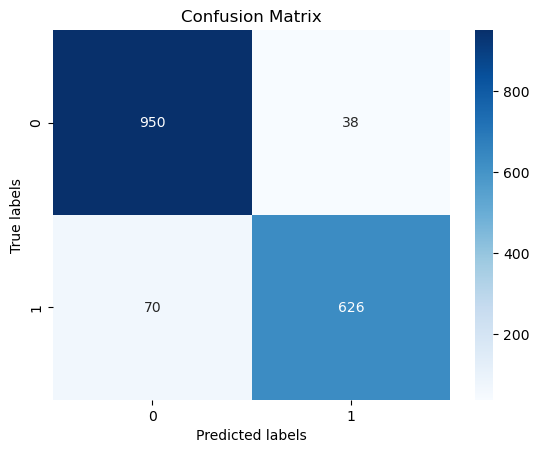

In [121]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)*100
confusion_mat = confusion_matrix(y_test,rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
report = classification_report(y_test, rf_pred)
print("Classification Report for Random Forest:")
print(report)
# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

### Model 4: AdaBoost

AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners to create a strong classifier. It works by iteratively training a sequence of weak learners (base classifiers) on modified versions of the dataset. Each weak learner focuses on the samples that were misclassified by the previous ones. After each iteration, AdaBoost assigns higher weights to the misclassified samples and lower weights to the correctly classified ones.

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Decision stump

# Create AdaBoost classifier with the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report for Random Forest:")
print(report)

AdaBoost Accuracy: 0.9293349168646081
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       988
           1       0.94      0.89      0.91       696

    accuracy                           0.93      1684
   macro avg       0.93      0.92      0.93      1684
weighted avg       0.93      0.93      0.93      1684



### Model Selection

| Model                   | Accuracy   |
|-------------------------|------------|
|Logistic Regression      | 91.39%           |
| Decision Tree           | 90.14%     |
| Decision Tree with Bagging | 92.16% |
| Random Forest           | 93.59%     |
| AdaBoost                | 92.93%     |  

We can also look at the precision and sensitivity values for each model.  

Precision: Precision is the ratio between the True Positives and all the Positives(true positives + false positives).

Recall (also known as sensitivity): Recall is the ratio of correctly True Positives to the total number of actual positive observations in the dataset (true positives + false negatives).  


| Method               | Class 0 Precision | Class 1 Precision | Class 0 Recall | Class 1 Recall |
|----------------------|-------------------|-------------------|----------------|----------------|
| Random Forest        | 0.93 | 0.94 | 0.96 | 0.90 |
| Decision Tree        | 0.91 | 0.89 | 0.92 | 0.87 |
| Logistic Regression  | 0.91 | 0.92 | 0.95 | 0.87 |
| AdaBoost             | 0.92 | 0.94 | 0.96 | 0.89 |

I choose the Random Forest as my final model beacause it has the highest accuracy and high precision and recall values compared to the other models.


### Cross validation (CV-5)

Cross-validation, is a popular technique for model evaluation and selection in machine learning.

1. The dataset is divided into five equally sized subsets, or folds.
2. Training and Validation: The model is trained on four of the folds and validated on the fifth fold. This process is repeated five times, each time using a different fold as the validation set and the remaining folds for training.
3. The performance of the model is evaluated on each validation set. Metrics such as accuracy, precision, recall, or others are calculated for each fold.
4. The performance metrics from each fold are averaged to obtain a single performance estimate for the model.


In [123]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print('Random Forest accuracy', rf_accuracy)
# Perform cross-validation (k-fold) on training data
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation on training data

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy (CV):", cv_scores.mean()*100)

Random Forest accuracy 93.58669833729216
Cross-Validation Scores: [0.95130641 0.93824228 0.95130641 0.96555819 0.83254157]
Mean Accuracy (CV): 92.7790973871734


### Grid Search

Grid search is a technique used for hyperparameter optimization in machine learning, especially in models that have multiple hyperparameters to tune. It systematically searches through a predefined set of hyperparameters, evaluating the model's performance for each combination, and selecting the combination that yields the best performance. We will try using GridSearch on our Random Forest Classifier.

In [124]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform Grid Search Cross Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.946159936658749


Interpretation
* max_depth: The trees in the Random Forest can have a maximum depth of 20.
* min_samples_leaf: At each leaf node of the trees, there must be at least 1 sample.
* min_samples_split: To split an internal node, there must be at least 2 samples in order for the split to occur.
* n_estimators: The Random Forest ensemble consists of 100 individual decision trees.
* The best score of approximately 0.9461 indicates the performance of the model using these hyperparameters. 